In [5]:
import pandas as pd

from sklearn.metrics import ndcg_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### Prepare data

In [ ]:
X = train_df[num_cols + cat_cols + text_cols]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Random forest Algorithm

In [ ]:
forest_ = RandomForestClassifier(class_weight='balanced', random_state=42)
forest_.fit(X_train, y_train)

y_pred_rf_ = forest_.predict(X_test)
y_proba_rf_ = forest_.predict_proba(X_test)

y_test_multilabel_rf_ = label_binarize(y_test, classes=range(12))
print('Random Forest NDCG: ',ndcg_score(y_test_multilabel_rf_, y_proba_rf_, k=5),'\n')

Random Forest NDCG:  0.8368090935612108 



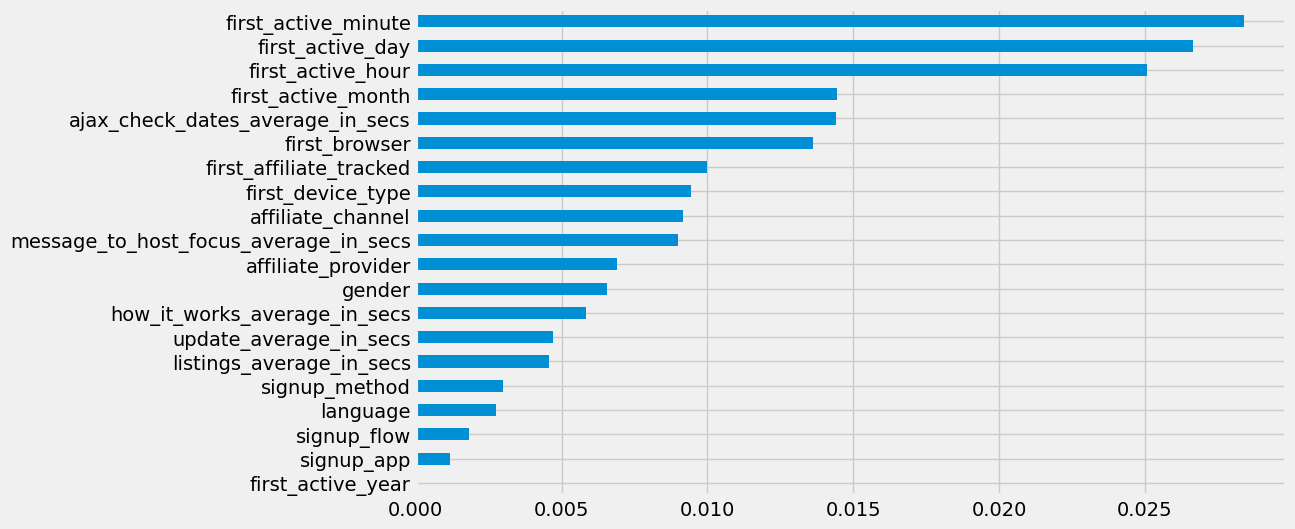

In [ ]:
pd.Series(forest_.feature_importances_, index=X_train.columns)[:20].sort_values().plot(kind='barh');

### LightGBM Algorithm


In [ ]:
lgb_clf_ = LGBMClassifier(objective='multiclass', random_state=42)
lgb_clf_.fit(X_train, y_train)

y_pred_lgb_ = lgb_clf_.predict(X_test)
y_proba_lgb_ = lgb_clf_.predict_proba(X_test)

y_test_multilabel_lgb_ = label_binarize(y_test, classes=range(12))
print('LightGBM NDCG: ',ndcg_score(y_test_multilabel_lgb_, y_proba_lgb_, k=5),'\n')

LightGBM NDCG:  0.8409264657734886 



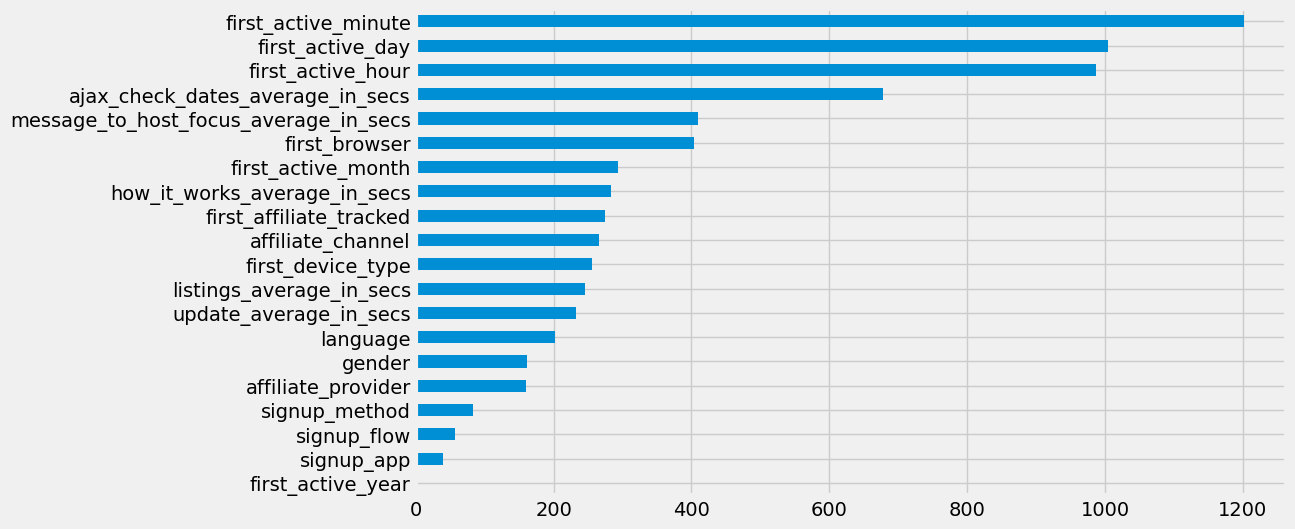

In [ ]:
pd.Series(lgb_clf_.feature_importances_, index=X_train.columns)[:20].sort_values().plot(kind='barh');

### XGBoost Algorithm


In [ ]:
xgb_ = XGBClassifier(n_estimators=5, random_state=42)
xgb_.fit(X_train, y_train)

y_pred_xgb_ = xgb_.predict(X_test)
y_proba_xgb_ = xgb_.predict_proba(X_test)

y_test_multilabel_xgb_ = label_binarize(y_test, classes=range(12))
print('XGBoost NDCG: ',ndcg_score(y_test_multilabel_xgb_, y_proba_xgb_, k=5),'\n')

XGBoost NDCG:  0.842638742905932 



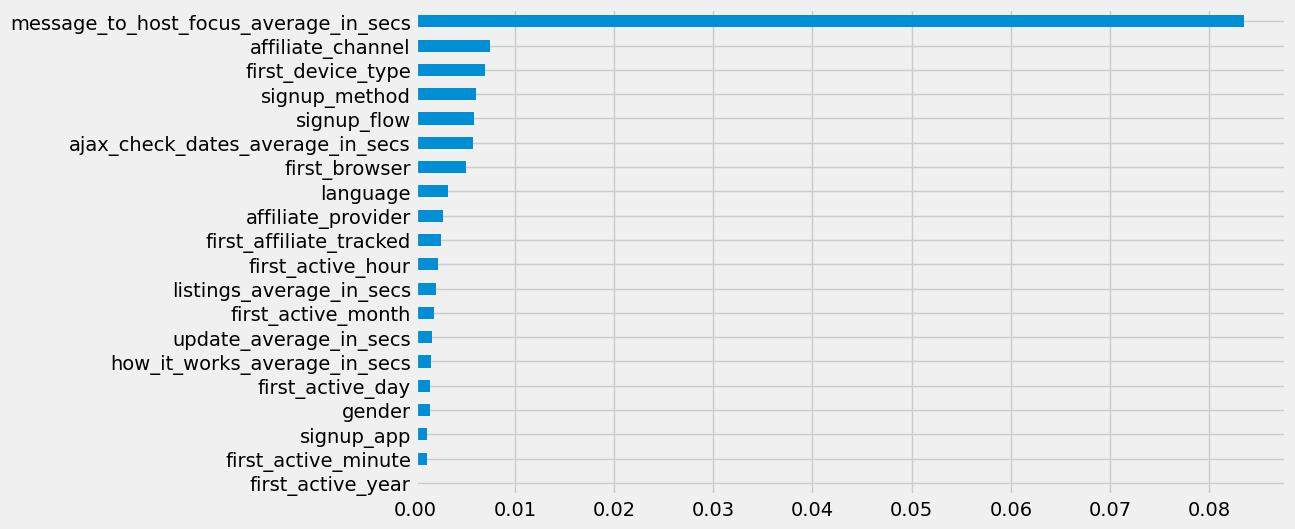

In [ ]:
pd.Series(xgb_.feature_importances_, index=X_train.columns)[:20].sort_values().plot(kind='barh');

### Model optimization

In [ ]:
print('\tAlgorithm\t |\t Score')
print('\t-----------------------------------------------------------------------------------------')
print('\tRandom Forest  \t |\t\t', '\t |\t\t', round(ndcg_score(y_test_multilabel_rf_, y_proba_rf_, k=5),5))
print('\tLightGBM  \t |\t\t', '\t |\t\t', round(ndcg_score(y_test_multilabel_lgb_, y_proba_lgb_, k=5),5))
print('\tXGBoost  \t |\t\t', '\t |\t\t', round(ndcg_score(y_test_multilabel_xgb_, y_proba_xgb_, k=5),5))

	Algorithm	 |	 num_cols + cat_cols	 |	 num_cols + cat_cols + text_cols
	----------------------------------------------------------------------------------------------------
	Random Forest  	 |		 0.8023 	 |		 0.83681
	LightGBM  	 |		 0.81749 	 |		 0.84093
	CatBoost  	 |		 0.81593 	 |		 0.84196
	XGBoost  	 |		 0.81949 	 |		 0.84264


In [ ]:
xgb_params = {'eta': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.6, 'seed': 2018, 'eval_metric': 'merror', 'objective': 'multi:softprob'}

max_depths = [4, 5, 6, 7]

for depth in max_depths:
    xgb_opt = XGBClassifier(max_depth=depth, **xgb_params)
    xgb_opt.fit(X_train, y_train)

    y_pred_opt_train = xgb_opt.predict(X_train)
    y_proba_opt_train = xgb_opt.predict_proba(X_train)

    y_pred_opt_test = xgb_opt.predict(X_test)
    y_proba_opt_test = xgb_opt.predict_proba(X_test)

    y_test_multilabel_opt_train = label_binarize(y_train, classes=range(12))
    print('XGBoost NDCG (train):', ndcg_score(y_test_multilabel_opt_train, y_proba_opt_train, k=5))

    y_test_multilabel_opt_test = label_binarize(y_test, classes=range(12))
    print('XGBoost NDCG (test):', ndcg_score(y_test_multilabel_opt_test, y_proba_opt_test, k=5))
    print()


XGBoost NDCG (train): 0.8570347454895739
XGBoost NDCG (test): 0.8439906578183657

XGBoost NDCG (train): 0.8642752308612901
XGBoost NDCG (test): 0.8433317819000905

XGBoost NDCG (train): 0.8718403099068623
XGBoost NDCG (test): 0.8424121954756897

XGBoost NDCG (train): 0.8814631661274834
XGBoost NDCG (test): 0.8427811960923601



In [ ]:
xgb_params = {'subsample': 0.8, 'colsample_bytree': 0.6, 'seed': 2018, 'eval_metric': 'merror', 'objective': 'multi:softprob', 'max_depth':4}

etas = [0.08, 0.1, 0.12]

for eta in etas:
    xgb_opt = XGBClassifier(eta = eta, **xgb_params)
    xgb_opt.fit(X_train, y_train)

    y_pred_opt_train = xgb_opt.predict(X_train)
    y_proba_opt_train = xgb_opt.predict_proba(X_train)

    y_pred_opt_test = xgb_opt.predict(X_test)
    y_proba_opt_test = xgb_opt.predict_proba(X_test)

    y_test_multilabel_opt_train = label_binarize(y_train, classes=range(12))
    print('XGBoost NDCG (train):', ndcg_score(y_test_multilabel_opt_train, y_proba_opt_train, k=5))

    y_test_multilabel_opt_test = label_binarize(y_test, classes=range(12))
    print('XGBoost NDCG (test):', ndcg_score(y_test_multilabel_opt_test, y_proba_opt_test, k=5))
    print()


XGBoost NDCG (train): 0.8548718976949843
XGBoost NDCG (test): 0.843835894438218

XGBoost NDCG (train): 0.8570347454895739
XGBoost NDCG (test): 0.8439906578183657

XGBoost NDCG (train): 0.8592022478686729
XGBoost NDCG (test): 0.8437604779868796

